# Cars4U - Problem Statement - Joey Arato

Cars4U is in need of help to develop a pricing model for its used cars. The used car market in India has seen huge demand and grown to be larger than the new car market. Cars4U would like to be able to better support this market with a more accurate pricing model

## Load Libraries

In [1]:
# Install nb_black if not already installed, commenting out for now since its installed on my system
# pip install nb_black

In [2]:
# Helps with good practices in the code (note to self comment cannot be on the same line)
%load_ext nb_black

# Data manipulation libraries ---------
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)   #remove limit for dispalying columns
pd.set_option('display.max_rows', 200)   #sets a limit of 200 for displaying the max number of rows

#---------------------------------------------------------------

# Data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#---------------------------------------------------------------

# Machine learning libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import tmean

#---------------------------------------------------------------

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


<IPython.core.display.Javascript object>

## Read Dataset and review its characteristics 

In [3]:
data = pd.read_csv("used_cars_data.csv")
data.shape

(7253, 14)

<IPython.core.display.Javascript object>

In [4]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<IPython.core.display.Javascript object>

In [5]:
df = data  # copy data into a new data frame so as not to inadvertantly change the orginal data set

<IPython.core.display.Javascript object>

In [6]:
df.info()  # review the basic info on the data set, looks like we have several objects lets see if we can reclaim some memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

In [7]:
df.memory_usage()  # check the memory usabe of the data

Index                  128
S.No.                58024
Name                 58024
Location             58024
Year                 58024
Kilometers_Driven    58024
Fuel_Type            58024
Transmission         58024
Owner_Type           58024
Mileage              58024
Engine               58024
Power                58024
Seats                58024
New_Price            58024
Price                58024
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# Converting the Name and Location Columns to categories. The other object may or may not be able to be dropped or become numerical information
df["Name"] = df["Name"].astype("category")
df["Location"] = df["Location"].astype("category")

<IPython.core.display.Javascript object>

In [9]:
df.info()  # checking to see if the change to category worked for Name and Location

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   category
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   object  
 6   Transmission       7253 non-null   object  
 7   Owner_Type         7253 non-null   object  
 8   Mileage            7251 non-null   object  
 9   Engine             7207 non-null   object  
 10  Power              7078 non-null   object  
 11  Seats              7200 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
dtypes: category(2), float64(2), int64(3), object(7)
memory usage: 782.2+ KB


<IPython.core.display.Javascript object>

In [10]:
df.describe().T  #   Lets get a look at the numerical data stats

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


<IPython.core.display.Javascript object>

In [11]:
# Describe details about the objects in the data set, pushing to the other view since i think its easier with more columns
df.describe(include=("object")).T

,count,unique,top,freq
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952
Mileage,7251,450,17.0 kmpl,207
Engine,7207,150,1197 CC,732
Power,7078,385,74 bhp,280
New_Price,1006,625,95.13 Lakh,6


<IPython.core.display.Javascript object>

## Data pre-processing (Missing Value Treatment) 
Lets check for nulls

In [12]:
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# Lets see what precentage of the data set is null for New_Price
6247 / 7253

0.8612987729215497

<IPython.core.display.Javascript object>

We can see there arent a ton of overly concenring nulls outside of New_Price. However in New_price 86% of the data set is null. Will drop this column. For Power, Seats, Engine and Mileage will fill in the data with Null values. In this next section will at stripping out 'kmpl' and similare from Mileage, 'CC from Engine' & 'BHP' from Power. Those columns will then be convereted to numerical values. 

In [14]:
df.drop(["New_Price"], axis=1, inplace=True)  # Droping the New_Price column

<IPython.core.display.Javascript object>

In [15]:
df.sample(100)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4157,4157,Mahindra XUV500 W8 4WD,Pune,2013,55000,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,8.50
1790,1790,Honda City 1.3 EXI,Pune,2004,73500,Petrol,Manual,Second,13.0 kmpl,1343 CC,90 bhp,5.0,1.30
6024,6024,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0,NaN
7181,7181,Hyundai EON Era,Pune,2012,36317,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN
2214,2214,Chevrolet Sail Hatchback 1.2 LS ABS,Kolkata,2014,14000,Petrol,Manual,First,18.2 kmpl,1199 CC,82.5 bhp,5.0,3.00
4862,4862,Mercedes-Benz New C-Class C 220 CDI Style,Hyderabad,2015,39000,Diesel,Automatic,First,19.27 kmpl,2143 CC,167.62 bhp,5.0,34.00
5106,5106,Maruti Ritz VXi,Coimbatore,2011,50318,Petrol,Manual,First,18.5 kmpl,1197 CC,85.80 bhp,5.0,4.06
6002,6002,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09 kmpl,1598 CC,103.5 bhp,5.0,3.25
2886,2886,Honda City 1.5 V MT,Delhi,2011,90000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,3.40
2491,2491,Maruti Omni 8 Seater BSIV,Mumbai,2011,39000,Petrol,Manual,First,14.0 kmpl,796 CC,35 bhp,5.0,1.50


<IPython.core.display.Javascript object>

In [16]:
convert = ["Mileage", "Engine", "Power"]

<IPython.core.display.Javascript object>

In [17]:
# Function to convert Mileage, Engine & Power Column to a numerical value. Will strip out any non-nuemerical data, we know we there are two nulls in Mileage those will be replaced with nan


def object_to_num(mileage):
    if isinstance(mileage, str):
        return float(
            mileage.replace("kmpl", "")
            .replace("km/kg", "")
            .replace("CC", "")
            .replace("bhp", "")
        )
    else:
        return np.nan


for col in convert:
    df[col] = df[col].apply(object_to_num)

df.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6058,6058,BMW 5 Series 520d Luxury Line,Mumbai,2012,66889,Diesel,Automatic,First,22.48,1995.0,190.00,5.0,NaN
2229,2229,Honda City i-VTEC CVT ZX,Coimbatore,2018,20300,Petrol,Automatic,First,18.00,1497.0,117.30,5.0,14.21
2526,2526,Hyundai i20 Sportz 1.2,Mumbai,2017,14001,Petrol,Manual,First,18.60,1197.0,81.83,5.0,5.75
1342,1342,Maruti Swift Dzire VDI Optional,Pune,2016,23000,Diesel,Manual,First,26.59,1248.0,74.00,5.0,7.05
90,90,Honda Amaze SX i-VTEC,Mumbai,2016,18949,Petrol,Manual,First,17.80,1198.0,86.70,5.0,5.00
3096,3096,Mercedes-Benz E-Class E250 CDI Avantgrade,Kochi,2015,41057,Diesel,Automatic,First,13.00,2143.0,201.10,5.0,24.63
5838,5838,Renault Duster 85PS Diesel RxL Explore,Pune,2016,55000,Diesel,Manual,First,19.87,1461.0,83.80,5.0,7.80
693,693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,55.54
6086,6086,Volkswagen Ameo 1.5 TDI Comfortline,Mumbai,2018,4708,Diesel,Manual,First,21.66,1498.0,108.62,5.0,NaN
4216,4216,Maruti Wagon R VXI,Coimbatore,2015,43053,Petrol,Manual,First,18.90,998.0,67.10,5.0,4.65


<IPython.core.display.Javascript object>

In [18]:
df.info()  # We can see Mileage, Engine and Power have all been convereted to Floats at this point

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   category
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   object  
 6   Transmission       7253 non-null   object  
 7   Owner_Type         7253 non-null   object  
 8   Mileage            7251 non-null   float64 
 9   Engine             7207 non-null   float64 
 10  Power              7078 non-null   float64 
 11  Seats              7200 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(2), float64(5), int64(3), object(3)
memory usage: 725.5+ KB


<IPython.core.display.Javascript object>

In [19]:
# Serial number is the same as index dropping the entire column
df.drop(["S.No."], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [20]:
df.sample(20)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5989,Audi A4 35 TDI Premium Plus,Coimbatore,2013,58629,Diesel,Automatic,Second,18.25,1968.0,187.74,5.0,16.52
1790,Honda City 1.3 EXI,Pune,2004,73500,Petrol,Manual,Second,13.00,1343.0,90.00,5.0,1.30
2509,Mercedes-Benz E-Class E 220 d,Mumbai,2018,11000,Diesel,Automatic,First,16.10,1950.0,194.00,5.0,56.50
2283,Maruti Ciaz VDi,Jaipur,2017,62691,Diesel,Manual,First,26.21,1248.0,88.50,5.0,7.50
7047,Toyota Corolla Executive (HE),Hyderabad,2007,158000,Petrol,Manual,Second,13.40,1794.0,125.00,5.0,NaN
144,Toyota Fortuner 3.0 Diesel,Coimbatore,2012,91235,Diesel,Manual,First,11.50,2982.0,171.00,7.0,13.49
2131,Honda City 1.5 V MT Exclusive,Mumbai,2013,45000,Petrol,Manual,First,17.00,1497.0,118.00,5.0,4.55
3994,Audi Q7 35 TDI Quattro Technology,Coimbatore,2016,32545,Diesel,Automatic,First,12.07,2967.0,241.40,7.0,48.76
5514,Volkswagen Vento 1.5 TDI Highline,Ahmedabad,2015,52123,Diesel,Manual,First,20.34,1498.0,103.20,5.0,7.50
795,Maruti Ertiga ZXI,Bangalore,2013,68000,Petrol,Manual,Second,16.02,1373.0,93.70,7.0,6.25


<IPython.core.display.Javascript object>

In [21]:
df.isnull().sum().sort_values(
    ascending=False
)  # Lets take a look at whats missing one more time

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

<IPython.core.display.Javascript object>

Lets remove the missing values in the data set

In [22]:
df = df.dropna()

<IPython.core.display.Javascript object>

In [23]:
df.isnull().sum().sort_values(
    ascending=False
)  # Lets take a look at whats missing one more time

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<IPython.core.display.Javascript object>

## Univariate & Bivariate Analysis

### Lets look at Price

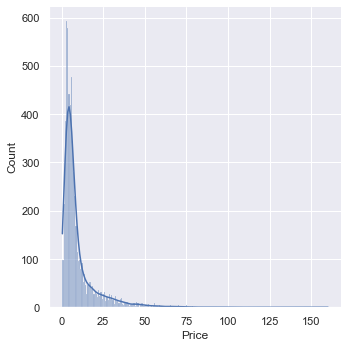

<IPython.core.display.Javascript object>

In [24]:
sns.displot(data=df, x="Price", kde=True)

<AxesSubplot:xlabel='Price'>

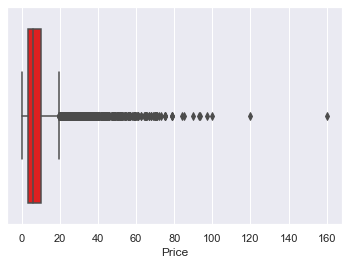

<IPython.core.display.Javascript object>

In [25]:
# sns.boxplot(data=df, x="Price", y="Year", color="blue")
sns.boxplot(data=df, x="Price", color="red")

### Lets do a log transformation on Price and see what it looks like
Im doing this a bit early to see what it looks like, just in case im gonna do this with a dedicated variable and not on the frame ive been working with 

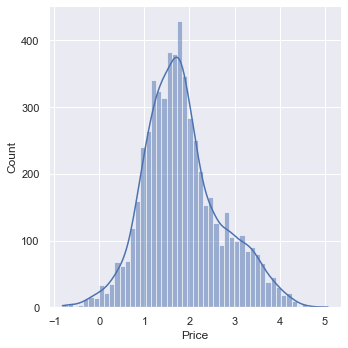

<IPython.core.display.Javascript object>

In [26]:
# Lets see if doing a log conversion will help with skew in pricing
sns.displot(np.log(df.Price), kde=True)

## Lets see what location can tell us

In [27]:
df["Location"].nunique()  # how many unique locations do we have?

11

<IPython.core.display.Javascript object>

In [28]:
# function to generate bar plots
def barplot(data, feature, perc=False, n=None):

    unique_values = data[
        feature
    ].nunique()  # ccount how many unique values we have per market

    if n is None:
        plt.figure(figsize=(unique_values + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)

    plot = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for percentage in plot.patches:
        label = "{:.1f}%".format(100 * percentage.get_height() / len(df[feature]))
        plot.annotate(label, (percentage.get_x(), percentage.get_height()))

    x = 1
    y = 1

    plt.show

<IPython.core.display.Javascript object>

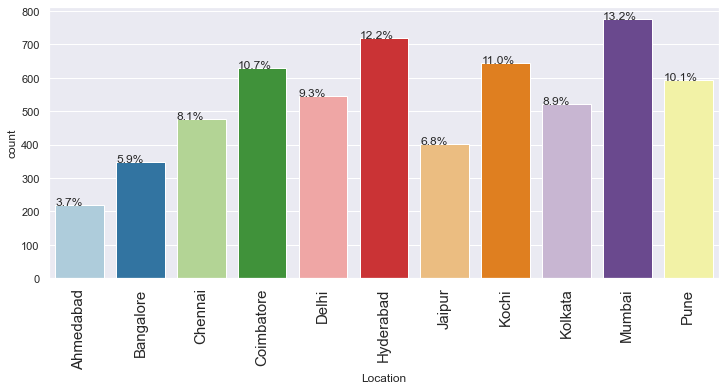

<IPython.core.display.Javascript object>

In [29]:
barplot(df, "Location", perc=True)

In [30]:
df.groupby("Location").Price.median().sort_values(
    ascending=False
)  # what are our unique locations and what are their median price points?

Location
Coimbatore    8.360
Bangalore     7.200
Kochi         6.750
Ahmedabad     5.950
Hyderabad     5.950
Mumbai        5.800
Delhi         5.530
Chennai       4.725
Pune          4.475
Jaipur        4.250
Kolkata       3.750
Name: Price, dtype: float64

<IPython.core.display.Javascript object>

### Price Analysis 

* Prices are heavily skewed toward the lower end of the spectrum  
* We do see a handful of outliers at the higher end of the spectrum  
* We can see that Coimbatore followed by Bangalore and Kochi have the highest median price with Coimbatore being more than double that of Kolkate. 
* We can see that Chennai, Jaipur, Pune & Kolkata are all on the lower end of median pricing and might be markets to stay away from 
* Hyderebad and Mumbai both fall into the middle of median prices but have a significant porition of car sales


### Lets look in more detail at Fuel Type and Owner Type

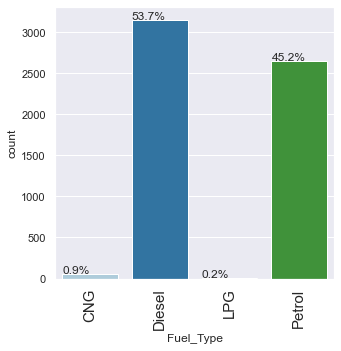

<IPython.core.display.Javascript object>

In [31]:
barplot(df, "Fuel_Type", perc=True)

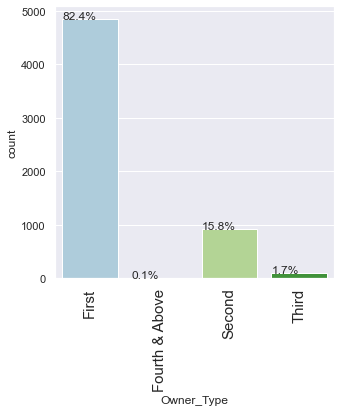

<IPython.core.display.Javascript object>

In [32]:
barplot(df, "Owner_Type", perc=True)

* We can see Diesel and Petrol cars make up the majority of the market
* We can see the vast majority of cars sold are 1 or 2 owner cars

### Lets look at our bivariate analysis for other interesting data interactions

<AxesSubplot:>

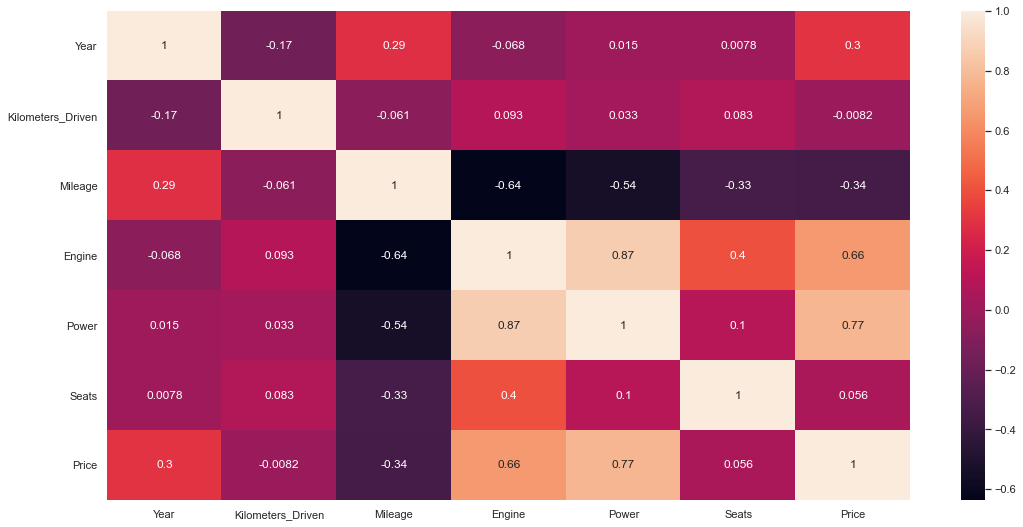

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot=True)

### Heat Map Analysis 
* We can see strong positive correlations between Engine and Power & Power & Price  
* Slightly strong positive correlations between Engine and Price  
* Interestingly Power is a better indicator of price than the Engine, will focus on using Power instead of Engine

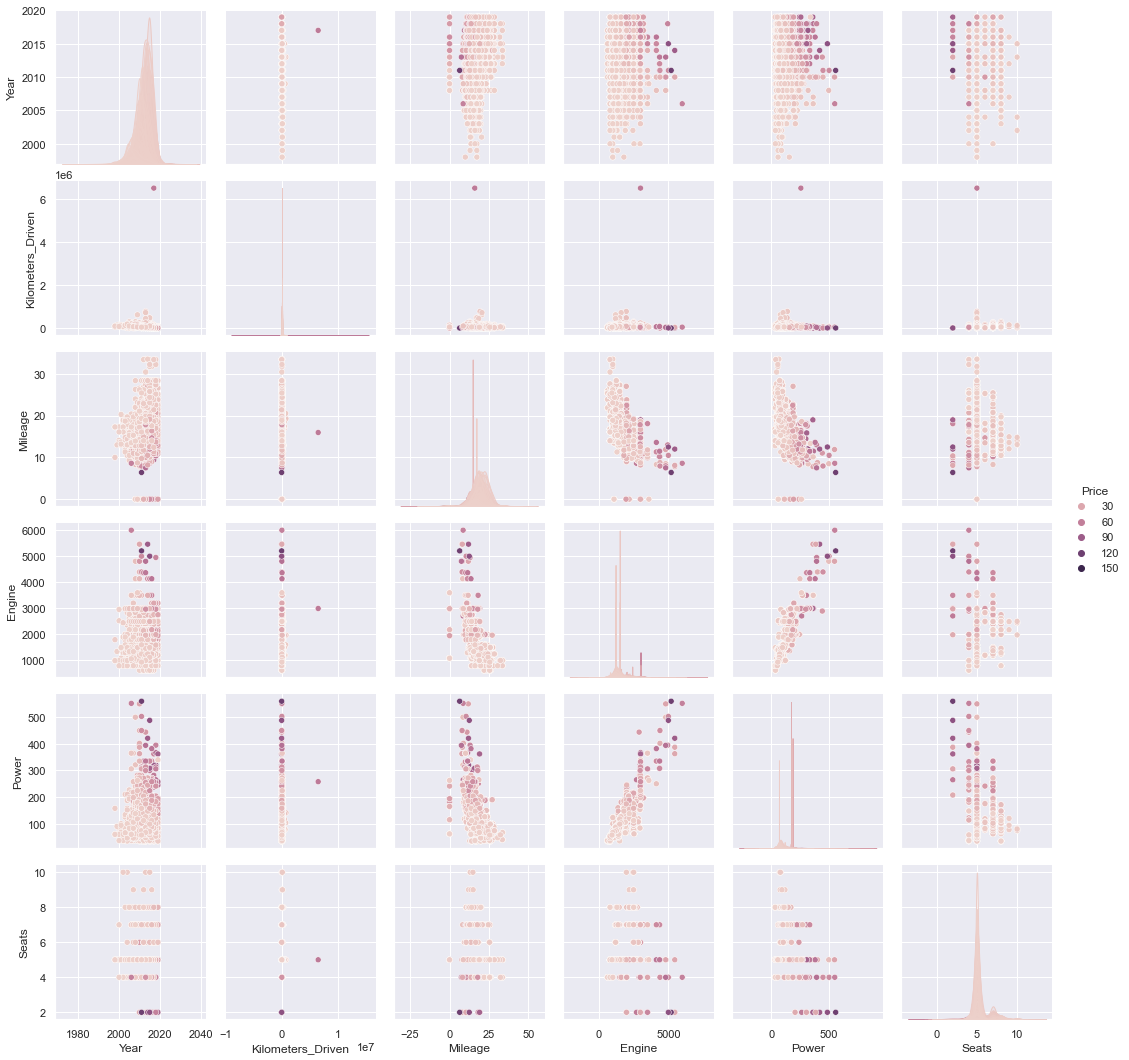

<IPython.core.display.Javascript object>

In [34]:
sns.pairplot(data=df, hue="Price", diag_kind="kde")

### Pair Plot Analysis

* We can see between 2000 and 2010 the range of engine sizes saw a failry large increase from largely being at the lower end of the specturm to over 500cc. Since 2010 the range has retracted slightly. However, the number of options for engine size is still much larger in 2020 vs 2000. There are similar finding with Engine, however, Power has stronger correlation to price than Engine so we will focus on Power instead. 
* We can see that since 2000 the range of seats per car has increased dramatically. Interestingly lower seat cars did not occur with enough frequecy to be shown in earier years of the data set. 
* We can see cars with higher power and lower miles driven tend towards the higher end on prices 
* We will skip engine and focus more on Power due to power being closely related to Engine and better indicator of price. 
* We can see that lower number seats tend have higher prices. Interetestingly the most expensive cars in this pairing are from around 2010 & 2010 not the newest. 

## Data Pre-Processing (missing value treatment done up above prioir to Univariate and Bivariate analysis)

Will create dummy values for these columns 'Fuel_Type', 'Transmission' & 'Owner_Type' to one hots

### Get Dummies 

Will create dummy values for these columns 'Fuel_Type', 'Transmission' & 'Owner_Type' to one hots

In [35]:
df.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1085,Hyundai Creta 1.6 VTVT S,Kochi,2016,36855,Petrol,Manual,Second,15.29,1591.0,121.3,5.0,8.77
4808,Maruti Swift VDI,Pune,2012,94868,Diesel,Manual,First,22.90,1248.0,74.0,5.0,4.50
5505,Maruti Swift VDI,Pune,2014,103000,Diesel,Manual,Second,28.40,1248.0,74.0,5.0,5.25
1071,Ford Figo 2015-2019 1.5D Trend MT,Hyderabad,2017,95802,Diesel,Manual,Second,25.83,1498.0,99.0,5.0,4.55
433,Hyundai EON Era Plus,Kochi,2018,13102,Petrol,Manual,First,21.10,814.0,55.2,5.0,4.06


<IPython.core.display.Javascript object>

In [36]:
df = pd.get_dummies(
    df, columns=["Fuel_Type", "Transmission", "Owner_Type"], drop_first=True
)

<IPython.core.display.Javascript object>

In [37]:
df.sample(5)

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
1360,Nissan Sunny 2011-2014 XV,Pune,2013,8000,16.95,1498.0,97.7,5.0,3.75,0,0,1,1,0,0,0
32,Mahindra Ssangyong Rexton RX7,Bangalore,2013,72000,11.18,2696.0,184.0,7.0,12.50,1,0,0,0,0,1,0
1501,Toyota Fortuner 4x2 AT,Delhi,2013,123000,12.55,2982.0,168.5,7.0,16.50,1,0,0,0,0,0,0
5186,Volkswagen Vento Petrol Highline AT,Mumbai,2011,45000,14.40,1598.0,103.6,5.0,3.35,0,0,1,0,0,0,0
3002,Maruti Swift VXI,Pune,2010,68000,22.00,1197.0,81.8,5.0,2.80,0,0,1,1,0,0,0


<IPython.core.display.Javascript object>

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5872.0,2013.477691,3.164568,1998.00,2012.0000,2014.00,2016.00,2019.00
Kilometers_Driven,5872.0,58316.999149,92169.410006,171.00,33422.5000,52609.00,72402.75,6500000.00
Mileage,5872.0,18.277839,4.365657,0.00,15.2600,18.20,21.10,33.54
Engine,5872.0,1625.745572,601.641783,624.00,1198.0000,1495.50,1991.00,5998.00
Power,5872.0,113.276894,53.881892,34.20,75.0000,97.70,138.10,560.00
Seats,5872.0,5.283719,0.805081,2.00,5.0000,5.00,5.00,10.00
Price,5872.0,9.603919,11.249453,0.44,3.5175,5.75,10.00,160.00
Fuel_Type_Diesel,5872.0,0.536785,0.498688,0.00,0.0000,1.00,1.00,1.00
Fuel_Type_LPG,5872.0,0.001703,0.041236,0.00,0.0000,0.00,0.00,1.00
Fuel_Type_Petrol,5872.0,0.452146,0.497747,0.00,0.0000,0.00,1.00,1.00


<IPython.core.display.Javascript object>

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Name                       5872 non-null   category
 1   Location                   5872 non-null   category
 2   Year                       5872 non-null   int64   
 3   Kilometers_Driven          5872 non-null   int64   
 4   Mileage                    5872 non-null   float64 
 5   Engine                     5872 non-null   float64 
 6   Power                      5872 non-null   float64 
 7   Seats                      5872 non-null   float64 
 8   Price                      5872 non-null   float64 
 9   Fuel_Type_Diesel           5872 non-null   uint8   
 10  Fuel_Type_LPG              5872 non-null   uint8   
 11  Fuel_Type_Petrol           5872 non-null   uint8   
 12  Transmission_Manual        5872 non-null   uint8   
 13  Owner_Type_Fourth & Above  5872 n

<IPython.core.display.Javascript object>

### Outlier Treatment & Log Transforms

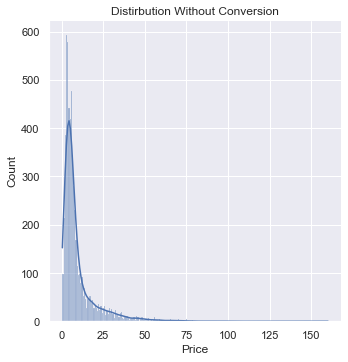

<IPython.core.display.Javascript object>

In [40]:
# The distribution of Price heavily skewed to the right lets see what happens if we do a log conversion
sns.displot(df.Price, kde=True)
plt.title("Distirbution Without Conversion")
plt.show()

The conversion will give us a more even distribtuion so lets do that and then double check to make sure it took

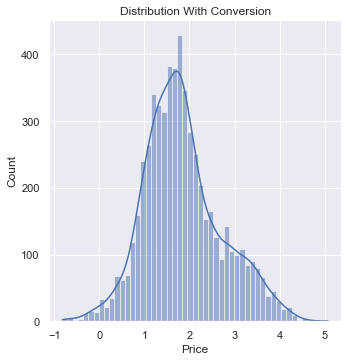

<IPython.core.display.Javascript object>

In [41]:
sns.displot(np.log(df.Price), kde=True)
plt.title("Distribution With Conversion")
plt.show()

In [60]:
feature = ["Price"]
for colname in feature:
    df[colname] = np.log(df[colname])

<IPython.core.display.Javascript object>

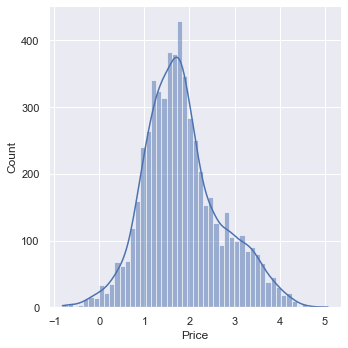

<IPython.core.display.Javascript object>

In [61]:
sns.displot(df.Price, kde=True)

We have seen we have a number of outliers lets see if minmax scaling can help, ill do this in a new data frames at first to see what it does 

In [62]:
df1 = df

<IPython.core.display.Javascript object>

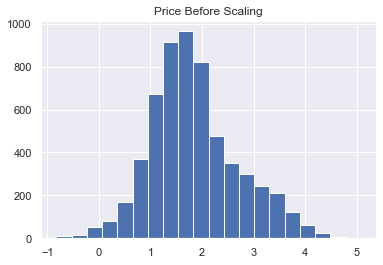

<IPython.core.display.Javascript object>

In [63]:
df1["Price"].hist(bins=20)
plt.title("Price Before Scaling")
plt.show()

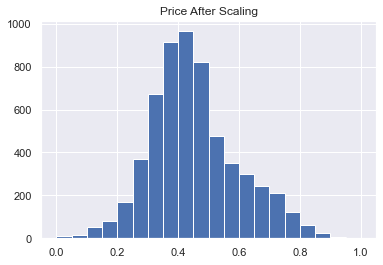

<IPython.core.display.Javascript object>

In [64]:
df1[["Price"]] = MinMaxScaler().fit_transform(df[["Price"]])

df1["Price"].hist(bins=20)
plt.title("Price After Scaling")
plt.show()

In [65]:
df2 = df  # Lets create a new data frame and test out a 'z' transformation

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

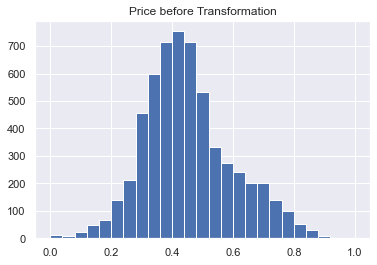

<IPython.core.display.Javascript object>

In [66]:
scaler = StandardScaler()

df2["Price"].hist(bins=25)
plt.title("Price before Transformation")
plt.show

Im not sure either of these of do much for us so ill not edit the main DF

## Linear Regression

In [72]:
# splitting the data into independant and dependant (Price) variables
X = df.drop(["Price", "Location", "Name"], axis=1)
y = df["Price"]

<IPython.core.display.Javascript object>

In [73]:
# splitting into train and test sets 70 / 30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [74]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [79]:
#create a new Data Frame and append the coeffcients to it
coefficients = pd.DataFrame(
    np.append(regression_model.coef_, regression_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

<IPython.core.display.Javascript object>

In [81]:
coefficients  # display the data frame

,Coefficients
Year,2.166119e-02
Kilometers_Driven,-7.006466e-09
Mileage,-3.604159e-03
Engine,1.975078e-05
Power,1.278374e-03
Seats,-6.590221e-04
Fuel_Type_Diesel,3.484857e-02
Fuel_Type_LPG,8.313305e-03
Fuel_Type_Petrol,-2.437501e-02
Transmission_Manual,-5.472689e-02


<IPython.core.display.Javascript object>

### Coefficient Analysis
* Coefficients for Year, Enginer, Power, Fuel_Type_Diesel & Fuel_Type_LPG are positive. An increase in these will lead to increase in price
* Kilometers driven, seats, Manual Transmissions and Cars with four or more owners all strongly lower the price

In [82]:
# The model is capable of explaining 87% of the variance in it
regression_model.score(X_train, y_train)

0.8719709583737909

<IPython.core.display.Javascript object>

In [83]:
# We can see the r2 for train and test are both very close
regression_model.score(X_test, y_test)

0.8728993348165194

<IPython.core.display.Javascript object>

In [110]:
# Lets look at Mean Absolute Error for the test data set
y_pred = regression_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
mean_absolute_error(y_test, y_pred)

0.03952728206894659

<IPython.core.display.Javascript object>

In [111]:
# Lets look at Mean Absolute Error for the train data set
y_pred2 = regression_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred2))
mean_absolute_error(y_train, y_pred2)

0.039804564186757485

<IPython.core.display.Javascript object>

In [120]:
# Lets check the MAPE for the Test Data Set
regression_test_predict = regression_model.predict(X_test)
regression_MAPE = MAPE(y_test, regression_test_predict)
print("The MAPE for the test data set is: ", regression_MAPE)

The MAPE for the test data set is:  12.703191485068665


<IPython.core.display.Javascript object>

In [121]:
# Lets check the MAPE for the Train Data Set
regression_test_predict = regression_model.predict(X_train)
regression_MAPE = MAPE(y_train, regression_test_predict)
print("The MAPE for the test data set is: ", regression_MAPE)

The MAPE for the test data set is:  inf


<IPython.core.display.Javascript object>

## Conclusions 
* Power is a better indicator of price than the Engine so this anaylsis prioitized Power over Engine since both are closely releated. 
* Cars with higher power and lower miles driven trend towards the higher end on prices 
* Lower number seats tend have higher prices. Interetestingly the most expensive cars in this pairing are from around 2010 & 2010 not the newest. 
* Prices are heavily skewed toward the lower end of the spectrum. If the company would like to focus on quantity we should focus on the lower end of the specturm.
* If the company wants to prioritize margins we should focus on more expensive cars such as high power lower number of seat vehicals. 
* There is a handful of outliers at the higher end of the spectrum on price.
* Hyderebad and Mumbai both fall into the middle of median prices but have a significant porition of car sales
* The company should prioritze these markets (if focusing on margins) since they have a higher medium price and / or make up a significant portion of sales
    * Coimbatore
    * Bangalore 
    * Kochi
    * Hyderebad
    * Mumbai
* These markets are on the lower end of median pricing and might be markets to stay away from if focusing on margins
    * Chennai
    * Jaipur
    * Pune
    * Kolkata 
* The company should focus on Diesel and Petrol cars and should probably ignore vehicals with other fuel types
* The company should focus on first and second owner cars and ignore cares with three or more owners
* New Cars with bigger diesel engines will lead to great sale price 
* Cars with more Kilometers, Manual Transmissions and 4+ owners should be avoided as they will lower the price.
* Cars with lower number of seat will fetch the greatest price
